# nmi | spring 2024
## lecture 20 : elliptic


### 8.3 elliptic


the heat and wave equations were functions of time; elliptic equations model steady states. eg, a steady-state distribution of heat on a plane whose boundary is held at a specific temperature.
</br>


##### <b><font color=grey>definition 06</font> laplacian</b>


let $u(x,y)$ be 2x differentiable function and define the <b>laplacian</b> of $u$ as
</br></br>

$$\Delta u = u_{xx} + u_{yy}.$$
</br>


for continuous function $f(x,y)$, the partial differential equation
</br></br>

$$\Delta u(x,y) = f(x,y)$$
</br>

is called the <b>poisson equation</b>. the poisson equation with $f(x,y) = 0$ is called the <b>laplace equation</b> and its solution is called a <b>harmonic</b> function.
</br>


##### usw


the extra conditions to for a single solution are typically boundary conditions. dirichlet boundary conditions specify values of the solution $u(x,y)$ on boundary $\partial R$ of region $R$. neumann boundary conditions specify values of the direction derivative $\frac{\partial u}{\partial n}$ on boundary where $n$ denotes the outward unit normal vector.
</br>


##### example 07


show $u(x,y) = x^2 - y^2$ is a solution of the laplace equation on $[0,1] \times [0,1]$ with dirichlet boundary conditions
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u(x,0) = x^2 \\
      u(x,1) = x^2 - 1 \\
      u(0,y) = -y^2 \\
      u(1,y) = 1 - y^2.
    \end{array}
  \right.
\end{align}
</br>



laplacian $\Delta u = u_{xx} + u_{yy} = 2 - 2 = 0$ can be verified by its boundary conditions. $\checkmark$
</br>


##### usw


poisson and laplace equations are ubiquitous in classical physics bc their solutions represent potential energy. eg, an electric field $E$ is the gradient of an electrostatic potential $u$
</br></br>

$$E = -\nabla u.$$
</br>

the gradient of an electric field is related to charge density $\rho$ by [maxwells equation](https://en.wikipedia.org/wiki/Gauss%27s_law)
</br></br>

$$\nabla E = \frac{\rho}{\epsilon},$$
</br>

where $\epsilon$ is the [electrical permittivity](https://en.wikipedia.org/wiki/Vacuum_permittivity).
</br></br>

$$\Rightarrow\quad \Delta u = \nabla (\nabla u) = -\frac{\rho}{\epsilon},$$
</br>

the poisson equation for potential $u$. in the special case of zero charge, the potential satisfies the laplace equation $\Delta u = 0$.
</br></br>

other instances of potential energy are modeled by the poisson equation: aerodynamics at low speeds are the solution of the laplace equation. and gravitational potential $u$ generated by a distribution of mass density $\rho$ satisfies the poisson equation
</br></br>

$$\Delta u = 4\pi G\rho,$$
</br>

where $G$ is the gravitational constant.

#### 8.3.1 FDM


consider the poisson equation $\Delta u = f$ on rectangle $[x_l,x_r]\times[y_b,y_t]$ in the plane with dirichlet boundary conditions.
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u(x,y_b) = g_1(x) \\
      u(x,t_t) = g_2(x) \\
      u(x_l,y) = g_3(x) \\
      u(x_r,y) = g_4(x).
    \end{array}
  \right.
\end{align}
</br>

with $M = m - 1$ steps along $x$ and $N = n - 1$ steps along $t$ with mesh sizes $h = \frac{x_r-x_l}{M}, k = \frac{y_t-y_b}{N}$.
</br></br>

a centered-difference formula can approxiate both second derivatives in the laplacian operator. the poisson equation has the FDM form
</br></br>

$$\frac{u(x-h,y)-2u(x,y)+u(x+h,y)}{h^2} + \mathcal{O}(h^2) + \frac{u(x,y-k)-2u(x,y)+u(x,y+k)}{k^2} + \mathcal{O}(k^2) = f(x,y)$$
</br>

and $w_{ij} \approx u(x_i,y_j)$
</br></br>

$$\frac{w_{i-1,j}-2w_{ij}+w_{i+1,j}}{h^2} + \frac{w_{i,j-1}-2w_{ij}+w_{i,j+1}}{k^2} = f(x_i,y_j)$$
</br>

where $x_i = x_l + (i-1)h, y_j = y_b + (j-1)k$ for $1\le i\le m, 1\le j\le n$.
</br>


bc the unknowns are $m\cdot n$, use alternative system for solution values
</br></br>

$$v_{i+(j-1)m} = w_{ij} \Rightarrow A_{mn\times mn}v=b.$$
</br>

ie, $A_{pq}$ is $q$th linear coefficient of $p$th equation. ie, at point $(i,j)$, equation $p = i+(j-1)m$ with coefficients $w_{i-1,j},w_{ij},\dots$.
</br>


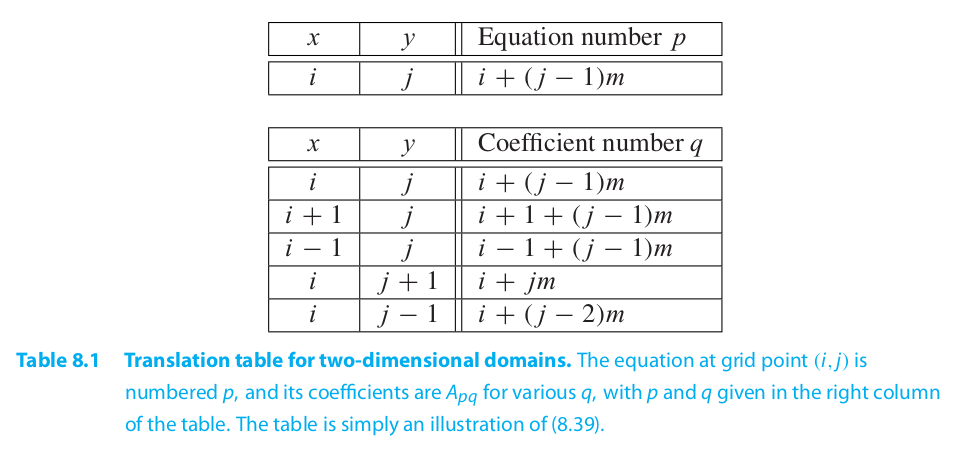

by $p,q$, matrix entries $A_{pq}$
</br></br>

\begin{align}
  A_{i+(j-1)m,i+(j-1)m} &= \frac{2}{h^2} - \frac{2}{k^2} \\
  A_{i+(j-1)m,i+1+(j-1)m} &= \frac{1}{h^2} \\
  A_{i+(j-1)m,i-1+(j-1)m} &= \frac{1}{h^2} \\
  A_{i+(j-1)m,i+jm} &= \frac{1}{k^2} \\
  A_{i+(j-1)m,i+(j-2)m} &= \frac{1}{k^2}
\end{align}
</br>

and RHS for $(i,j)$,
</br></br>

$$b_{i+(j-1)m} = f(x_i,y_i)$$
</br>

for interior points $1<i<m,1<j<n$.
</br></br>

for boundary points - in this case, dirichlet boundary conditions,
</br></br>

\begin{align}
  \text{bottom} &\quad w_{ij} = g_1(x_i), \quad j=1,1\le i\le m \\
  \text{top} &\quad w_{ij} = g_2(x_i), \quad j=n,1\le i\le m \\
  \text{left} &\quad w_{ij} = g_3(y_j), \quad i=1,1<j<n \\
  \text{right} &\quad w_{ij} = g_4(y_j), \quad i=m,1<j<n \\
  \\
  &\quad\Downarrow \\
  \\
  \text{bottom} &\quad A_{i+(j-1)m,i+(j-1)m} = 1,b_{i+(j-1)m} = g_1(x_i), \quad j=1,1\le i\le m \\
  \text{top} &\quad A_{i+(j-1)m,i+(j-1)m} = 1,b_{i+(j-1)m} = g_2(x_i), \quad j=n,1\le i\le m \\
  \text{left} &\quad A_{i+(j-1)m,i+(j-1)m} = 1,b_{i+(j-1)m} = g_3(y_j), \quad i=1,1<j<n \\
  \text{right} &\quad A_{i+(j-1)m,i+(j-1)m} = 1,b_{i+(j-1)m} = g_4(y_j), \quad i=m,1<j<n
\end{align}
</br>

all other entries of $A,b$ are zero.
</br>



##### example 08


apply FDM with $m=n=5$ to approximate laplace equation $\Delta u = 0$ on $[0,1]\times [1,2]$ with dirichlet boundary conditions
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u(x,1) = ln(x^2+1) \\
      u(x,2) = ln(x^2+4) \\
      u(0,y) = 2lny \\
      u(1,y) = ln(y^2+1).
    \end{array}
  \right.
\end{align}
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>

```
% example 08
% Program 05 Finite difference solver for 2D Poisson equation
% with Dirichlet boundary conditions on a rectangle
% Input: rectangle domain [xl,xr]x[yb,yt] with MxN space steps
% Output: matrix w holding solution values
% Example usage: w=poisson(0,1,1,2,4,4)
function w=poisson(xl,xr,yb,yt,M,N)
  f=@(x,y) 0; % define input function data
  g1=@(x) log(x.^2+1); % define boundary values
  g2=@(x) log(x.^2+4); % Example 8.8 is shown
  g3=@(y) 2*log(y);
  g4=@(y) log(y.^2+1);
  m=M+1;n=N+1; mn=m*n;
  h=(xr-xl)/M;h2=h^2;k=(yt-yb)/N;k2=k^2;
  % set mesh values
  x=xl+(0:M)*h;
  y=yb+(0:N)*k;
  A=zeros(mn,mn);b=zeros(mn,1);
  % interior points
  for i=2:m-1
    for j=2:n-1
      A(i+(j-1)*m,i-1+(j-1)*m)=1/h2;A(i+(j-1)*m,i+1+(j-1)*m)=1/h2;
      A(i+(j-1)*m,i+(j-1)*m)=-2/h2-2/k2;
      A(i+(j-1)*m,i+(j-2)*m)=1/k2;A(i+(j-1)*m,i+j*m)=1/k2;
      b(i+(j-1)*m)=f(x(i),y(j));
    end
  end
  % bottom and top boundary points
  for i=1:m
    j=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g1(x(i));
    j=n;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g2(x(i));
  end
  % left and right boundary points
  for j=2:n-1
    i=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g3(y(j));
    i=m;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g4(y(j));
  end
  % solve for solution in v labeling
  v=A\b;
  w=reshape(v(1:mn),m,n); %translate from v to w
  mesh(x,y,w')
  xlabel('x')
  ylabel('y')
end
```


###### code, python


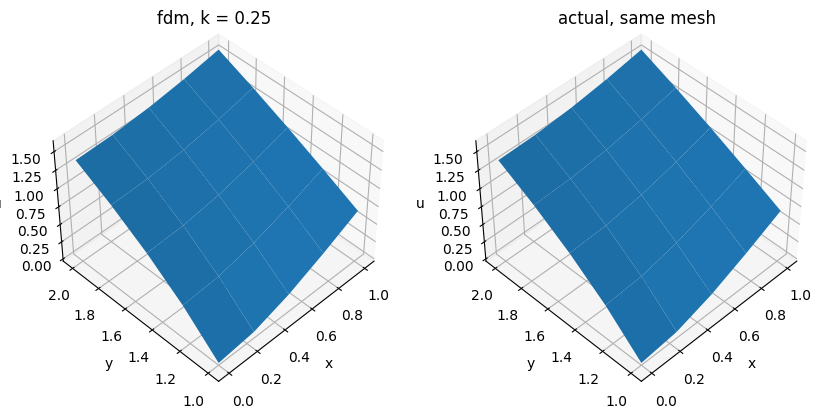

In [ ]:
# example 08 ~ program 05

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

# actual
U = lambda x,y: np.log(pow(x,2) + pow(y,2))

# ic,bc
F = lambda x,y: 0
G1 = lambda x: np.log(pow(x,2)+1)
G2 = lambda x: np.log(pow(x,2)+4)
G3 = lambda y: 2*np.log(y)
G4 = lambda y: np.log(pow(y,2)+1)

# intervals
x,y = [0,1],[1,2]
# subintervals, steps
M = 4
N = 4
h = (x[1]-x[0])/M
k = (y[1]-y[0])/N
# mesh
m = M+1   # x-size
n = N+1   # y-size
mn = m*n  # translation dimension
xs = np.linspace(x[0],x[1],m)
ys = np.linspace(y[0],y[1],n)
h2,k2 = pow(h,2),pow(k,2) # for convenience

# a,b
a = np.zeros((mn,mn))
b = np.zeros((mn,1))
# interior points
for i in range(1,m-1):
  for j in range(1,n-1):
    a[i+j*m,i-1+ j   *m] = a[i+j*m,i+1+ j   *m] = 1/h2
    a[i+j*m,i  + j   *m] = -2/h2-2/k2
    a[i+j*m,i  +(j-1)*m] = a[i+j*m,i  +(j+1)*m] = 1/k2
    b[i+j*m] = F(xs[i],ys[j])
# boundary
for i in range(m): # all points
  # bottom, j = 0
  j =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G1(xs[i])
  # top, j = n-1
  j = n-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G2(xs[i])
for j in range(1,n-1): # all but first and last
  # left, i = 0
  i =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G3(ys[j])
  # right, i = m-1
  i = m-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G4(ys[j])

vs = np.zeros((mn,1))
vs = np.linalg.solve(a,b)
ws = np.zeros((m,n))
ws = vs.reshape(ws.shape)

# plot some
if True:
  x,y = np.meshgrid(xs,ys) #,indexing='ij') # sauers algorithm uses cartesian
  fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs[0].set_title("fdm, k = " + str(k))
  axs[0].plot_surface(x,y,ws)
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("y")
  axs[0].set_zlabel("u")

  us = U(x,y)
  axs[1].set_title("actual, same mesh")
  axs[1].plot_surface(x,y,us)
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("y")
  axs[1].set_zlabel("u")

  for angle in range(0,360):
    axs[0].view_init(elev=45,azim=225,roll=0)
    axs[1].view_init(elev=45,azim=225,roll=0)

  plt.show()


##### example 09


electrostatic potential on $[0,1]\times [0,1]$ with no interior charge and the following boundary conditions
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u(x,0) = sin\pi x \\
      u(x,1) = sin\pi x \\
      u(0,y) = 0 \\
      u(1,y) = 0.
    \end{array}
  \right.
\end{align}
</br>

use mesh size $h=k=0.1$ or $M=N=10$.
</br>


only the boundary functions change! and the step-size but thats just a gimme.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br></br>


```
% example 09
% Program 8.5 Finite difference solver for 2D Poisson equation
% with Dirichlet boundary conditions on a rectangle
% Input: rectangle domain [xl,xr]x[yb,yt] with MxN space steps
% Output: matrix w holding solution values
% Example usage: w=poisson(0,1,1,2,4,4)
function w=poisson(xl,xr,yb,yt,M,N)
  f=@(x,y) 0; % define input function data
  g1=@(x) sin(pi*x); % define boundary values
  g2=@(x) sin(pi*x); % Example 8.9 is shown
  g3=@(y) 0;
  g4=@(y) 0;
  m=M+1;n=N+1; mn=m*n;
  h=(xr-xl)/M;h2=h^2;k=(yt-yb)/N;k2=k^2;
  % set mesh values
  x=xl+(0:M)*h;
  y=yb+(0:N)*k;
  A=zeros(mn,mn);b=zeros(mn,1);
  % interior points
  for i=2:m-1
    for j=2:n-1
      A(i+(j-1)*m,i-1+(j-1)*m)=1/h2;A(i+(j-1)*m,i+1+(j-1)*m)=1/h2;
      A(i+(j-1)*m,i+(j-1)*m)=-2/h2-2/k2;
      A(i+(j-1)*m,i+(j-2)*m)=1/k2;A(i+(j-1)*m,i+j*m)=1/k2;
      b(i+(j-1)*m)=f(x(i),y(j));
    end
  end
  % bottom and top boundary points
  for i=1:m
    j=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g1(x(i));
    j=n;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g2(x(i));
  end
  % left and right boundary points
  for j=2:n-1
    i=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g3(y(j));
    i=m;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g4(y(j));
  end
  % solve for solution in v labeling
  v=A\b;
  w=reshape(v(1:mn),m,n); %translate from v to w
  mesh(x,y,w')
  xlabel('x')
  ylabel('y')
end
```


###### code, python


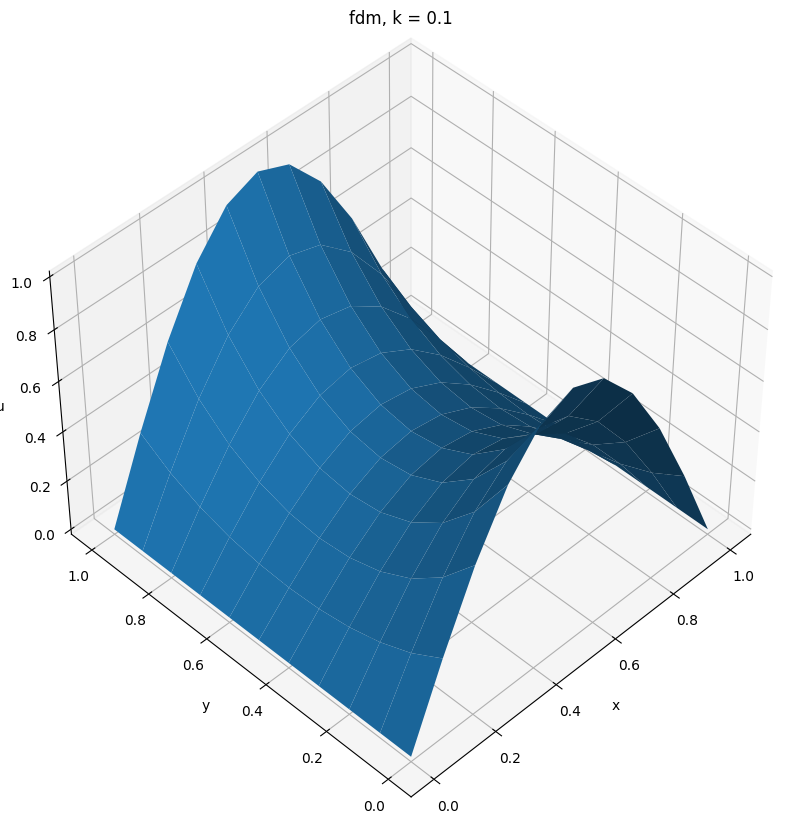

In [ ]:
# example 09 ~ program 05

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

# actual
U = lambda x,y: np.log(pow(x,2) + pow(y,2))

# ic,bc
F = lambda x,y: 0
G1 = lambda x: np.sin(np.pi*x) # << 1/8 changed this
G2 = lambda x: np.sin(np.pi*x) # << 2/8 changed this
G3 = lambda y: 0 # << 3/8 changed this
G4 = lambda y: 0 # << 4/8 changed this

# intervals
x,y = [0,1],[0,1] # << 5/8 changed this
# subintervals, steps
M = 10 # << 6/8 changes this
N = 10 # << 7/8 changed this
h = (x[1]-x[0])/M
k = (y[1]-y[0])/N
# mesh
m = M+1   # x-size
n = N+1   # y-size
mn = m*n  # translation dimension
xs = np.linspace(x[0],x[1],m)
ys = np.linspace(y[0],y[1],n)
h2,k2 = pow(h,2),pow(k,2) # for convenience

# a,b
a = np.zeros((mn,mn))
b = np.zeros((mn,1))
# interior points
for i in range(1,m-1):
  for j in range(1,n-1):
    a[i+j*m,i-1+ j   *m] = a[i+j*m,i+1+ j   *m] = 1/h2
    a[i+j*m,i  + j   *m] = -2/h2-2/k2
    a[i+j*m,i  +(j-1)*m] = a[i+j*m,i  +(j+1)*m] = 1/k2
    b[i+j*m] = F(xs[i],ys[j])
# boundary
for i in range(m): # all points
  # bottom, j = 0
  j =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G1(xs[i])
  # top, j = n-1
  j = n-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G2(xs[i])
for j in range(1,n-1): # all but first and last
  # left, i = 0
  i =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G3(ys[j])
  # right, i = m-1
  i = m-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G4(ys[j])

vs = np.zeros((mn,1))
vs = np.linalg.solve(a,b)
ws = np.zeros((m,n))
ws = vs.reshape(ws.shape)

# plot some
if True: # << 8/8 removed actual bc not given with eg and im not doing it
  x,y = np.meshgrid(xs,ys) #,indexing='ij') # sauers algorithm uses cartesian
  fig,axs = plt.subplots(1,1,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs.set_title("fdm, k = " + str(k))
  axs.plot_surface(x,y,ws)
  axs.set_xlabel("x")
  axs.set_ylabel("y")
  axs.set_zlabel("u")

  for angle in range(0,360):
    axs.view_init(elev=45,azim=225,roll=0)

  plt.show()


#### 8.3.2 FEM


FEM converts the differential equation into a variational equivalent called the weak form of the equation.
</br></br>

consider the dirichlet problem for elliptic equation
</br></br>

\begin{align}
  \Delta u + r(x,y)u &= f(x,y) \quad \text{in }R \\
  u &= g(x,y) \quad \text{on }S
\end{align}
</br>

where solution $u(x,y)$ is defined on a region $R$ in the plane bounded by a piecewise-smooth closed curve $S$. use $L^2$ function space over region $R$. let
</br></br>

$$L^2(R) = \left\{ \text{functions } \phi(x,y) \text{ on }R \quad \left| \quad \iint_R \phi(x,y)^2dxdy \text{ exists and is finite} \right . \right\}.$$
</br></br>

consider subspace $L^2_0(R)$ consisting of functions zero on boundary $S$ of region $R$. minimize the squared error of the elliptic equation by forcing residual $\Delta u(x,y) + r(x,y)u(x,y) - f(x,y)$ to be orthogonal to a large subspace of $L^2(R)$. let $\phi_1(x,y),...,\phi_p(x,y)$ be elements of $L^2(R)$. ie,
</br></br>

$$\iint_R (\Delta u + ru - f)\phi_p dxdy = 0$$
</br>

$$\Rightarrow\quad \iint_R(\Delta u + ru)\phi_p dxdy = \iint_R f\phi_p dxdy$$
</br>

for each $1\le p\le P$. this is the weak form.
</br>



##### <b><font color=grey>theorem 07</font> greens first identity</b>


let $R$ be bounded region with piecewise smooth boundary $S$. let $u,v$ be smooth functions and let $n$ denote outward unit normal along boundary.
</br></br>

$$\iint_R v\Delta u = \int_S v \frac{\partial u}{\partial n} dS - \iint_R \nabla u\cdot \nabla v.$$
</br>


with directional derivative, $\frac{\partial u}{\partial n} = \nabla u \cdot (n_x,n_y)$, apply greens theorem to the weak form.
</br></br>

$$\Rightarrow\quad \int_S \phi_P\frac{\partial u}{\partial n} dS - \iint_R (\nabla u\cdot \nabla \phi_P) dxdy + \iint_R ru\phi_P dxdy = \iint_R f\phi_P dxdy.$$
</br></br>

replace u with FEM,
</br></br>

$$w(x,y) = \sum_{q=1}^Pv_q\phi_q(x,y)$$
</br>

and determine unknown $v_q$. assume $\phi_p \in L_0^2(R)$ - ie, $\phi_p(S) = 0$. for each $\phi_p \in L_0^2(R)$
</br></br>

\begin{align}
  \iint_R\left( \sum_{q=1}^P v_q\nabla \phi_q \right)\cdot \nabla \phi_p dxdy - \iint_R r \left( \sum_{q=1}^P v_q\phi_q\right) \phi_p dxdy &= \iint_R f\phi_p dxdy \\
  \\
  \Downarrow\quad & \\
  \\
  \sum_{q=1}^P v_q \underbrace{\left[ \iint_R \nabla \phi_q\cdot  \nabla \phi_p dxdy - \iint_R r\phi_q\phi_p dxdy \right]}_{\text{matrix }A} &= \underbrace{-\int_R f\phi_p dxdy}_{\text{matrix }b}.
\end{align}
</br></br>

ie, for each $\phi_p \in L_0^2(R)$, a system of linear equations in the unknowns $v_1,\dots,v_p$.</br>



choose linear b-splines for $\phi$. let $R$ be a rectangular $M\times N$ mesh of $m=M+1,n=N+1$ points and form a triangulation with nodes $(x_i,y_j)$.
</br>


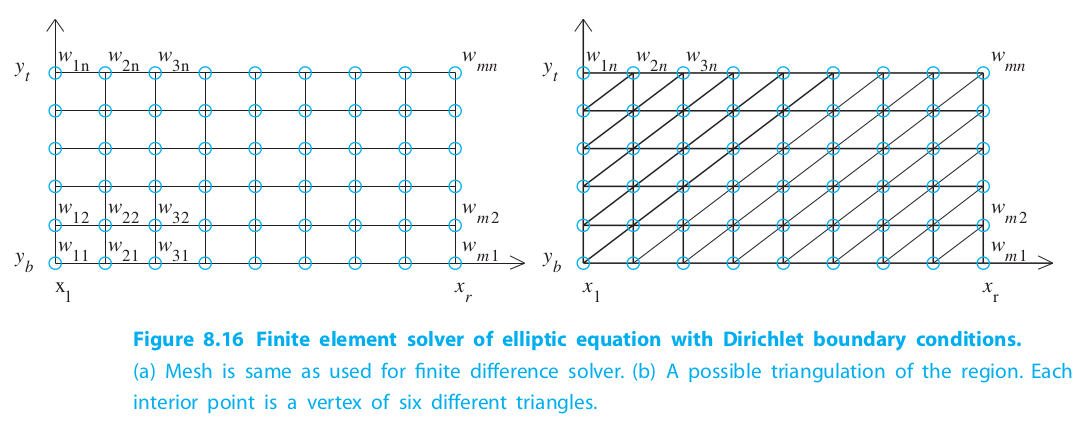

for $P=mn$ piecewise linear functions, $\phi_1,\dots,\phi_{mn}$,
</br></br>

\begin{align}
  \phi_{i+(j-1)m}(x_i,y_j) &= 1 \qquad\text{for point}(x_i,y_j) \\
  \phi_{i+(j-1)m}(x_i',y_j') &= 0 \qquad\text{for all other points}(x_i',y_j').
\end{align}
</br>

each $\phi_p(x,y)$ is differentiable except for triangle edges and is [riemann-integrable](https://en.wikipedia.org/wiki/Riemann_integral) function belonging to $L^2(R)$. for every non-boundary point $(x_i,y_j)$ of rectangle $R$, $\phi_{i+(j-1)m}$ belongs to $L_0^2(R)$.
</br></br>

$$w(x_i,y_j) = \sum_{i=1}^m \sum_{j=1}^n v_{i+(j-1)m} \phi_{i+(j-1)m}(x_i,y_j) = v_{i+(j-1)m} \qquad i=1,\dots,m, \quad j=1,\dots,n.$$
</br>

to solve that collection of boundary value problems, approximate the integrals of $A,b$ by 2d midpoint. define the barycenter of a region as the point $(\bar{x},\bar{y})$
</br></br>

$$\bar{x} = \frac{\iint_R x dxdy}{\iint_R 1 dxdy}, \quad\bar{y} = \frac{\iint_R y dxdy}{\iint_R 1 dxdy}.$$
</br>

oc if region is a triangle with vertices $(x_1,y_1),(x_2,y_2),(x_3,y_3)$
</br></br>

$$\bar{x} = \frac{x_1+x_2+x_3}{3}, \quad\bar{y} = \frac{y_1+y_2+y_3}{3}.$$
</br>


##### <b><font color=grey>lemma 08</font></b>


the average value of a linear function $L(x,y)$ on plane region $R$ is $L(\bar{x},\bar{y})$, the value at the barycenter. ie, $\iint_R L(x,y) dxdy = L(\bar{x},\bar{y})$.
</br>


###### proof


let $L(x,y) = a + bx + cy$. then
</br></br>

\begin{align}
  \iint_R L(x,y) dxdy &= \iint_R (a + bx + cy) dxdy \\
  &= a\iint_R dxdy + b\iint_R x dxdy + c\iint_R y dxdy \\
  &= \text{area}(R)\cdot (a+b\bar{x}+c\bar{y}). \enspace\blacksquare
\end{align}
</br>

##### usw


also, taylors for functions of two variables,
</br></br>

\begin{align}
  f(x,y) &= f(\bar{x},\bar{y}) + \frac{\partial f}{\partial x}(\bar{x},\bar{y})(x-\bar{x}) + \frac{\partial f}{\partial y}(\bar{x},\bar{y})(y-\bar{y}) + \mathcal{O}((x-\bar{x})^2,(x-\bar{x})(y-\bar{y}),(y-\bar{y})^2) \\
  \\
  &\quad \Downarrow \\
  \\
  \iint_R f(x,y) dxdy &= \iint_R L(x,y) dxdy + \iint_R \mathcal{O}((x-\bar{x})^2,(x-\bar{x})(y-\bar{y}),(y-\bar{y})^2) dxdy \\
  &= \text{area}(R)\cdot L(\bar{x},\bar{y}) + \mathcal{O}(h^4) \\
  &= \text{area}(R)\cdot f(\bar{x},\bar{y}) + \mathcal{O}(h^4)
\end{align}
</br></br>

where $h$ is the <b>diameter</b> of $R$, the largest distance between two points of $R$.
</br>


##### <b>midpoint rule in two dimensions</b>


$$\iint_R f(x,y) dxdy = \text{area}(R)\cdot f(\bar{x},\bar{y}) + \mathcal{O}(h^4)$$
</br>

where $(\bar{x},\bar{y})$ is barycenter of bounded region $R$ and $h=$ diam$(R)$.
</br>


ie, for midpoint rule applied to FEM with $\mathcal{O}(h^2)$, approximate integrals by evaluating integrands at triangle barycenters. which is why b-splines were chosen.
</br>


##### <b><font color=grey>lemma 09</font></b>


let $\phi(x,y)$ be linear function on triangle $T$ with vertices $(x_1,y_1),(x_2,y_2),(x_3,y_3)$ satisfying $\phi(x_1,y_1) = 1,\phi(x_2,y_2) = 0,\phi(x_3,y_3) = 0$. then $\phi(\bar{x},\bar{y}) = \frac{1}{3}$.
</br>


##### <b><font color=grey>lemma 10</font></b>


let $\phi_1(x,y),\phi_2(x,y)$ be linear functions on triangle $T$ with vertices $(x_1,y_1),(x_2,y_2),(x_3,y_3)$ satisfying $\phi_1(x_1,y_1) = 1,\phi_1(x_2,y_2) = 0,\phi_1(x_3,y_3) = 0,\phi_2(x_1,y_0) = 1,\phi_2(x_2,y_2) = 1,\phi_2(x_3,y_3) = 0$. let $f(x,y)$ be twice differentiable. set
</br></br>

$$d = det \begin{bmatrix} 1 & 1 & 1 \\ x_1 & x_2 & x_3 \\  y_1 & y_2 & y_3 \end{bmatrix}.$$
</br>

then
</br></br>

(a) triangle $T$ has area $\frac{|d|}{2}$
<br>

(b) $\nabla \phi_1(x,y) = \left( \frac{y_2-y_3}{d},\frac{x_3-x_2}{d} \right)$
<br>

(c) $\iint_T \nabla \phi_1\cdot \nabla \phi_1 dxdy = \frac{(x_2-x_3)^2+(y_2-y_3)^2}{2|d|}$
<br>

(d) $\iint_T \nabla \phi_1\cdot \nabla \phi_2 dxdy = \frac{-(x_1-x_3)(x_2-x_3)-(y_1-y_3)(y_2-y_3)}{2|d|}$
<br>

(e) $\iint_T f\phi_1\phi_2 dxdy = f(\bar{x},\bar{y})\frac{|d|}{18}+\mathcal{O}(h^4) = \iint_T f\phi_1^2 dxdy$
<br>

(f) $\iint_T f\phi_1 dxdy = f(\bar{x},\bar{y})\frac{|d|}{6} + \mathcal{O}(h^4)$
</br></br>

where $(\bar{x},\bar{y})$ is barycenter of $T$ and $h=$ diam$(T)$.
</br>



##### usw


<i>now</i> calculate $A$.
</br></br>

consider vertex $(x_i,y_j)$ not on boundary $S$ of rectangle $R$. then $\phi_{i+(j-1)m}$ belongs to $L_0^2(R)$ and $p=i+(j-1)m$ and $A_{pp}$ is composed of two integrals. the integrands are zero outside of the six triangles shown.
</br>


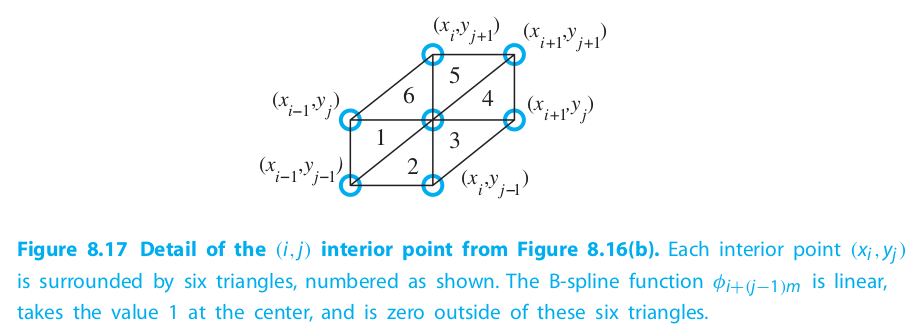

the triangles have horizontal and vertical sides $h,k$ respectively. for first integral, summing from triangle $1$ to triangle $6$, use lemma 8.10.c
</br></br>

$$\frac{k^2}{2hk}+\frac{h^2}{2hk}+\frac{h^2+k^2}{2hk}+\frac{k^2}{2hk}+\frac{h^2}{2hk}+\frac{h^2+k^2}{2hk} = \frac{2(h^2+k^2)}{hk}.$$
</br>

for second integral use lemma 10 (e). the barycenters of the six triangles are
</br></br>

\begin{align}
  B_1 &= (x_i - \frac{2}{3}h,y_j - \frac{1}{3}k) \\
  B_2 &= (x_i - \frac{1}{3}h,y_j - \frac{2}{3}k) \\
  B_3 &= (x_i + \frac{1}{3}h,y_j - \frac{1}{3}k) \\
  B_4 &= (x_i + \frac{2}{3}h,y_j + \frac{1}{3}k) \\
  B_5 &= (x_i + \frac{1}{3}h,y_j + \frac{2}{3}k) \\
  B_6 &= (x_i - \frac{1}{3}h,y_j + \frac{1}{3}k) \\
  \\
  &\quad\Downarrow \\
  \\
  \sum B &= -\frac{hk}{18}\left[ r(B_1) + r(B_2) + r(B_3)+ r(B_4)+ r(B_5)+ r(B_6)\right].
\end{align}
</br></br>

\begin{align}
  A_{i+(j-1)m,i+(j-1)m} &= \frac{2(h^2+k^2)}{hk} - \frac{hk}{18}\left[ r(B_1) + r(B_2) + r(B_3)+ r(B_4)+ r(B_5)+ r(B_6)\right] \\
  \\
  &\quad \Downarrow\text{similarly} \\
  \\
  A_{i+(j-1)m,i-1+(j-1)m} &= -\frac{k}{h} - \frac{hk}{18}\left[ r(B_6) + r(B_1)\right] \\
  A_{i+(j-1)m,i-1+(j-2)m} &= -\frac{hk}{18}\left[ r(B_1) + r(B_2)\right] \\
  A_{i+(j-1)m,i+(j-2)m} &= -\frac{h}{k} - \frac{hk}{18}\left[ r(B_2) + r(B_3)\right] \\
  A_{i+(j-1)m,i+1+(j-1)m} &= -\frac{h}{k} - \frac{hk}{18}\left[ r(B_3) + r(B_4)\right] \\
  A_{i+(j-1)m,i+1+jm} &= -\frac{hk}{18}\left[ r(B_4) + r(B_5)\right] \\
  A_{i+(j-1)m,i+jm} &= -\frac{hk}{18}\left[ r(B_5) + r(B_6)\right]
\end{align}
</br>


for $b$, use lemma 10 (f).
</br></br>

$$b_{i+(j-1)m} = -\frac{hk}{6}[f(B_1)+f(B_2)+f(B_3)+f(B_4)+f(B_5)+f(B_6)].$$
</br>

for FEM functions on boundary, $\phi_{i+(j-1)m}$ does not belong to $L_0^2(R)$ equations
</br></br>

\begin{align}
  A_{i+(j-1)m,i+(j-1)m} &= 1 \\
  b_{i+(j-1)m} &= g(x_i,y_j)
\end{align}
</br>

will guarantee dirichlet boundary condition $v_{i+(j-1)m} = g(x_i,y_j)$ where $(x_i,y_j)$ is a boundary point.
</br>


##### example 10


apply FEM with $M=N=4$ to laplace quation $\Delta u = 0$ on $[0,1]\times[1,2]$ with dirichley boundary conditions
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      u(x,1) = ln(x^2+1) \\
      u(x,2) = ln(x^2+4) \\
      u(0,y) = 2lny \\
      u(1,y) = ln(y^2+1).
    \end{array}
  \right.
\end{align}
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br>

```
% Program 06 Finite element solver for 2D PDE
% with Dirichlet boundary conditions on a rectangle
% Input: rectangle domain [xl,xr]x[yb,yt] with MxN space steps
% Output: matrix w holding solution values
% Example usage: w=poissonfem(0,1,1,2,4,4)
function w=poissonfem(xl,xr,yb,yt,M,N)
  % define input function data
  f=@(x,y) 0;
  r=@(x,y) 0;
  % define boundary values
  g1=@(x) log(x.^2+1); % bottom
  g2=@(x) log(x.^2+4); % top
  g3=@(y) 2*log(y); % left side
  g4=@(y) log(y.^2+1); % right side
  m=M+1; n=N+1; mn=m*n;
  h=(xr-xl)/M; h2=h^2; k=(yt-yb)/N; k2=k^2; hk=h*k;
  % set mesh values
  x=xl+(0:M)*h;
  y=yb+(0:N)*k;
  A=zeros(mn,mn); b=zeros(mn,1);
  % interior points
  for i=2:m-1
    for j=2:n-1
      rsum=r(x(i)-2*h/3,y(j)-k/3)+r(x(i)-h/3,y(j)-2*k/3)...
        +r(x(i)+h/3,y(j)-k/3);
      rsum=rsum+r(x(i)+2*h/3,y(j)+k/3)+r(x(i)+h/3,y(j)+2*k/3)...
        +r(x(i)-h/3,y(j)+k/3);
      A(i+(j-1)*m,i+(j-1)*m)=2*(h2+k2)/(hk)-hk*rsum/18;
      A(i+(j-1)*m,i-1+(j-1)*m)=-k/h-hk*(r(x(i)-h/3,y(j)+k/3)...
        +r(x(i)-2*h/3,y(j)-k/3))/18;
      A(i+(j-1)*m,i-1+(j-2)*m)=-hk*(r(x(i)-2*h/3,y(j)-k/3)...
        +r(x(i)-h/3,y(j)-2*k/3))/18;
      A(i+(j-1)*m,i+(j-2)*m)=-h/k-hk*(r(x(i)-h/3,y(j)-2*k/3)...
        +r(x(i)+h/3,y(j)-k/3))/18;
      A(i+(j-1)*m,i+1+(j-1)*m)=-k/h-hk*(r(x(i)+h/3,y(j)-k/3)...
        +r(x(i)+2*h/3,y(j)+k/3))/18;
      A(i+(j-1)*m,i+1+j*m)=-hk*(r(x(i)+2*h/3,y(j)+k/3)...
        +r(x(i)+h/3,y(j)+2*k/3))/18;
      A(i+(j-1)*m,i+j*m)=-h/k-hk*(r(x(i)+h/3,y(j)+2*k/3)...
        +r(x(i)-h/3,y(j)+k/3))/18;
      fsum=f(x(i)-2*h/3,y(j)-k/3)+f(x(i)-h/3,y(j)-2*k/3)...
        +f(x(i)+h/3,y(j)-k/3);
      fsum=fsum+f(x(i)+2*h/3,y(j)+k/3)+f(x(i)+h/3,y(j)+2*k/3)...
        +f(x(i)-h/3,y(j)+k/3);
      b(i+(j-1)*m)=-h*k*fsum/6;
    end
  end
  % boundary points
  for i=1:m
    j=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g1(x(i));
    j=n;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g2(x(i));
  end
  for j=2:n-1
    i=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g3(y(j));
    i=m;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g4(y(j));
  end
  % solve for solution in v numbering
  v=A\b;
  w=reshape(v(1:mn),m,n);
  mesh(x,y,w')
end
```


###### code, python


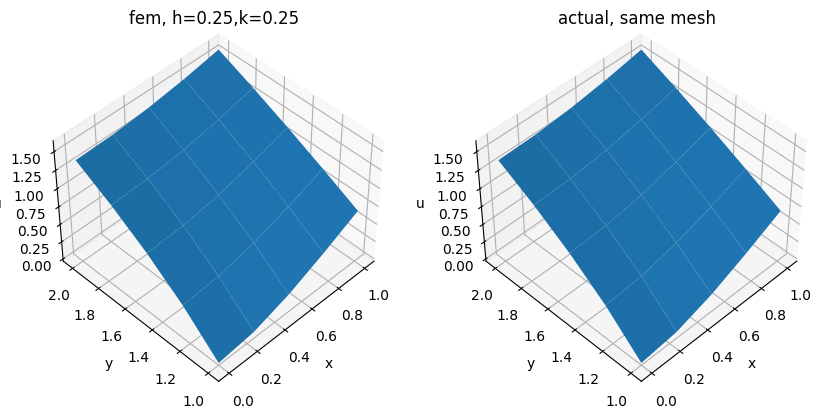

In [ ]:
# example 10 ~ program 06 FEM applied to example 10

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

# actual
U = lambda x,y: np.log(pow(x,2) + pow(y,2))

# ic,bc
F = lambda x,y: 0
R = lambda x,y: 0
G1 = lambda x: np.log(pow(x,2)+1)
G2 = lambda x: np.log(pow(x,2)+4)
G3 = lambda y: 2*np.log(y)
G4 = lambda y: np.log(pow(y,2)+1)

# intervals
x,y = [0,1],[1,2]
# subintervals, steps
M = 4
N = 4
h = (x[1]-x[0])/M
k = (y[1]-y[0])/N
# mesh
m = M+1   # x-size
n = N+1   # y-size
mn = m*n  # translation dimension
xs = np.linspace(x[0],x[1],m)
ys = np.linspace(y[0],y[1],n)
h2,k2,hk = pow(h,2),pow(k,2),h*k # for convenience

# a,b
a = np.zeros((mn,mn))
b = np.zeros((mn,1))
# interior points
for i in range(1,m-1):
  for j in range(1,n-1):
    rsum  = R(xs[i] - 2*h/3,ys[j] -   k/3) + R(xs[i] -   h/3,ys[j] - 2*k/3)
    rsum += R(xs[i] +   h/3,ys[j] -   k/3) + R(xs[i] + 2*h/3,ys[j] +   k/3)
    rsum += R(xs[i] +   h/3,ys[j] + 2*k/3) + R(xs[i] -   h/3,ys[j] +   k/3)
    a[i+j*m,i  + j   *m] = 2*(h2+k2)/hk - hk*rsum/18
    a[i+j*m,i-1+ j   *m] = -k/h - hk*(R(xs[i]-  h/3,ys[j]+  k/3) + R(xs[i]-2*h/3,ys[j]-  k/3))/18
    a[i+j*m,i-1+(j-1)*m] =       -hk*(R(xs[i]-2*h/3,ys[j]-  k/3) + R(xs[i]-  h/3,ys[j]-2*k/3))/18
    a[i+j*m,i  +(j-1)*m] = -h/k  -hk*(R(xs[i]-  h/3,ys[j]-2*k/3) + R(xs[i]+  h/3,ys[j]-  k/3))/18
    a[i+j*m,i+1+ j   *m] = -k/h - hk*(R(xs[i]+  h/3,ys[j]-  k/3) + R(xs[i]+2*h/3,ys[j]+  k/3))/18
    a[i+j*m,i+1+(j+1)*m] =       -hk*(R(xs[i]+2*h/3,ys[j]+  k/3) + R(xs[i]+  h/3,ys[j]+2*k/3))/18
    a[i+j*m,i  +(j+1)*m] = -h/k  -hk*(R(xs[i]+  h/3,ys[j]+2*k/3) + R(xs[i]-  h/3,ys[j]+  k/3))/18

    fsum  = F(xs[i] - 2*h/3,ys[j] -   k/3) + F(xs[i] -   h/3,ys[j] - 2*k/3)
    fsum += F(xs[i] +   h/3,ys[j] -   k/3) + F(xs[i] + 2*h/3,ys[j] +   k/3)
    fsum += F(xs[i] +   h/3,ys[j] + 2*k/3) + F(xs[i] -   h/3,ys[j] +   k/3)
    b[i+j*m] = -hk*fsum/6
# boundary
for i in range(m): # all points
  # bottom, j = 0
  j =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G1(xs[i])
  # top, j = n-1
  j = n-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G2(xs[i])
for j in range(1,n-1): # all but first and last
  # left, i = 0
  i =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G3(ys[j])
  # right, i = m-1
  i = m-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G4(ys[j])

vs = np.zeros((mn,1))
vs = np.linalg.solve(a,b)
ws = np.zeros((m,n))
ws = vs.reshape(ws.shape)

# plot some
if True:
  x,y = np.meshgrid(xs,ys) #,indexing='ij') # sauers algorithm uses cartesian
  fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs[0].set_title("fem, h=" + str(h) + ",k=" + str(k))
  axs[0].plot_surface(x,y,ws)
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("y")
  axs[0].set_zlabel("u")

  us = U(x,y)
  axs[1].set_title("actual, same mesh")
  axs[1].plot_surface(x,y,us)
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("y")
  axs[1].set_zlabel("u")

  for angle in range(0,360):
    axs[0].view_init(elev=45,azim=225,roll=0)
    axs[1].view_init(elev=45,azim=225,roll=0)

  plt.show()


##### example 11


apply FEM $M=N=16$ to approximate elliptic dirichlet problem
</br></br>

\begin{align}
  \quad
  \left\{ \quad
    \begin{array}{l}
      \Delta u + 4\pi^2u = 2sin2\pi y \\
      u(x,0) = 0, \quad 9\le x\le 1 \\
      u(x,1) = 0, \quad 9\le x\le 1 \\
      u(0,y) = 0, \quad 9\le y\le 1 \\
      u(1,y) = sin2\pi y, \quad 9\le y\le 1.
    \end{array}
  \right.
\end{align}
</br>

define $r(x,y) = 4\pi^2, f(x,y) = 2sin2\pi y$. actual solution $u(x,y) = x^2sin2\pi y$.
</br>


###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br>

```
% Program 06 Finite element solver for 2D PDE
% with Dirichlet boundary conditions on a rectangle
% Input: rectangle domain [xl,xr]x[yb,yt] with MxN space steps
% Output: matrix w holding solution values
% Example usage: w=poissonfem(0,1,0,1,16,16)
function w=poissonfem(xl,xr,yb,yt,M,N)
  % define input function data
  f=@(x,y) 2*sin(2*pi*y);
  r=@(x,y) 4*pi^2;
  % define boundary values
  g1=@(x) 0; % bottom
  g2=@(x) 0; % top
  g3=@(y) 0; % left side
  g4=@(y) sin(2*pi*y); % right side
  m=M+1; n=N+1; mn=m*n;
  h=(xr-xl)/M; h2=h^2; k=(yt-yb)/N; k2=k^2; hk=h*k;
  % set mesh values
  x=xl+(0:M)*h;
  y=yb+(0:N)*k;
  A=zeros(mn,mn); b=zeros(mn,1);
  % interior points
  for i=2:m-1
    for j=2:n-1
      rsum=r(x(i)-2*h/3,y(j)-k/3)+r(x(i)-h/3,y(j)-2*k/3)...
        +r(x(i)+h/3,y(j)-k/3);
      rsum=rsum+r(x(i)+2*h/3,y(j)+k/3)+r(x(i)+h/3,y(j)+2*k/3)...
        +r(x(i)-h/3,y(j)+k/3);
      A(i+(j-1)*m,i+(j-1)*m)=2*(h2+k2)/(hk)-hk*rsum/18;
      A(i+(j-1)*m,i-1+(j-1)*m)=-k/h-hk*(r(x(i)-h/3,y(j)+k/3)...
        +r(x(i)-2*h/3,y(j)-k/3))/18;
      A(i+(j-1)*m,i-1+(j-2)*m)=-hk*(r(x(i)-2*h/3,y(j)-k/3)...
        +r(x(i)-h/3,y(j)-2*k/3))/18;
      A(i+(j-1)*m,i+(j-2)*m)=-h/k-hk*(r(x(i)-h/3,y(j)-2*k/3)...
        +r(x(i)+h/3,y(j)-k/3))/18;
      A(i+(j-1)*m,i+1+(j-1)*m)=-k/h-hk*(r(x(i)+h/3,y(j)-k/3)...
        +r(x(i)+2*h/3,y(j)+k/3))/18;
      A(i+(j-1)*m,i+1+j*m)=-hk*(r(x(i)+2*h/3,y(j)+k/3)...
        +r(x(i)+h/3,y(j)+2*k/3))/18;
      A(i+(j-1)*m,i+j*m)=-h/k-hk*(r(x(i)+h/3,y(j)+2*k/3)...
        +r(x(i)-h/3,y(j)+k/3))/18;
      fsum=f(x(i)-2*h/3,y(j)-k/3)+f(x(i)-h/3,y(j)-2*k/3)...
        +f(x(i)+h/3,y(j)-k/3);
      fsum=fsum+f(x(i)+2*h/3,y(j)+k/3)+f(x(i)+h/3,y(j)+2*k/3)...
        +f(x(i)-h/3,y(j)+k/3);
      b(i+(j-1)*m)=-h*k*fsum/6;
    end
  end
  % boundary points
  for i=1:m
    j=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g1(x(i));
    j=n;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g2(x(i));
  end
  for j=2:n-1
    i=1;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g3(y(j));
    i=m;A(i+(j-1)*m,i+(j-1)*m)=1;b(i+(j-1)*m)=g4(y(j));
  end
  % solve for solution in v numbering
  v=A\b;
  w=reshape(v(1:mn),m,n);
  mesh(x,y,w')
end
```


###### code, python


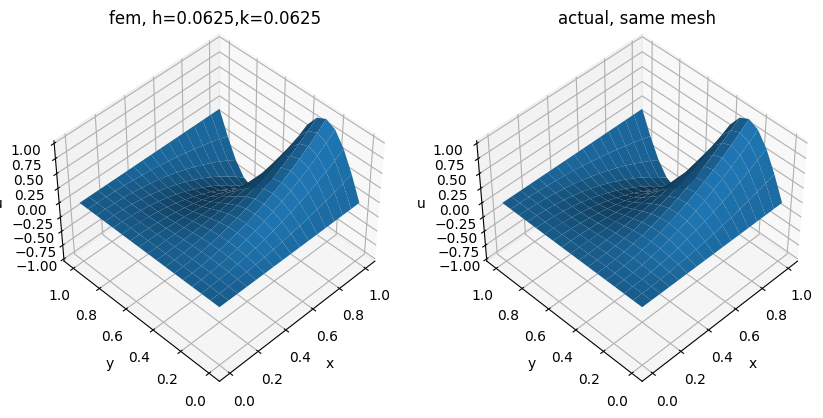

In [ ]:
# example 11 ~ program 06 FEM applied to example 11

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision=3,suppress=True)

# actual
U = lambda x,y: pow(x,2)*np.sin(2*np.pi*y)

# ic,bc
F = lambda x,y: 2*np.sin(2*np.pi*y)
R = lambda x,y: 4*pow(np.pi,2)
G1 = lambda x: 0
G2 = lambda x: 0
G3 = lambda y: 0
G4 = lambda y: np.sin(2*np.pi*y)

# intervals
x,y = [0,1],[0,1]
# subintervals, steps
M = 16
N = 16
h = (x[1]-x[0])/M
k = (y[1]-y[0])/N
# mesh
m = M+1   # x-size
n = N+1   # y-size
mn = m*n  # translation dimension
xs = np.linspace(x[0],x[1],m)
ys = np.linspace(y[0],y[1],n)
h2,k2,hk = pow(h,2),pow(k,2),h*k # for convenience

# a,b
a = np.zeros((mn,mn))
b = np.zeros((mn,1))
# interior points
for i in range(1,m-1):
  for j in range(1,n-1):
    rsum  = R(xs[i] - 2*h/3,ys[j] -   k/3) + R(xs[i] -   h/3,ys[j] - 2*k/3)
    rsum += R(xs[i] +   h/3,ys[j] -   k/3) + R(xs[i] + 2*h/3,ys[j] +   k/3)
    rsum += R(xs[i] +   h/3,ys[j] + 2*k/3) + R(xs[i] -   h/3,ys[j] +   k/3)
    a[i+j*m,i  + j   *m] = 2*(h2+k2)/hk - hk*rsum/18
    a[i+j*m,i-1+ j   *m] = -k/h - hk*(R(xs[i]-  h/3,ys[j]+  k/3) + R(xs[i]-2*h/3,ys[j]-  k/3))/18
    a[i+j*m,i-1+(j-1)*m] =       -hk*(R(xs[i]-2*h/3,ys[j]-  k/3) + R(xs[i]-  h/3,ys[j]-2*k/3))/18
    a[i+j*m,i  +(j-1)*m] = -h/k  -hk*(R(xs[i]-  h/3,ys[j]-2*k/3) + R(xs[i]+  h/3,ys[j]-  k/3))/18
    a[i+j*m,i+1+ j   *m] = -k/h - hk*(R(xs[i]+  h/3,ys[j]-  k/3) + R(xs[i]+2*h/3,ys[j]+  k/3))/18
    a[i+j*m,i+1+(j+1)*m] =       -hk*(R(xs[i]+2*h/3,ys[j]+  k/3) + R(xs[i]+  h/3,ys[j]+2*k/3))/18
    a[i+j*m,i  +(j+1)*m] = -h/k  -hk*(R(xs[i]+  h/3,ys[j]+2*k/3) + R(xs[i]-  h/3,ys[j]+  k/3))/18

    fsum  = F(xs[i] - 2*h/3,ys[j] -   k/3) + F(xs[i] -   h/3,ys[j] - 2*k/3)
    fsum += F(xs[i] +   h/3,ys[j] -   k/3) + F(xs[i] + 2*h/3,ys[j] +   k/3)
    fsum += F(xs[i] +   h/3,ys[j] + 2*k/3) + F(xs[i] -   h/3,ys[j] +   k/3)
    b[i+j*m] = -hk*fsum/6
# boundary
for i in range(m): # all points
  # bottom, j = 0
  j =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G1(xs[i])
  # top, j = n-1
  j = n-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G2(xs[i])
for j in range(1,n-1): # all but first and last
  # left, i = 0
  i =   0; a[i+j*m,i+j*m] = 1; b[i+j*m] = G3(ys[j])
  # right, i = m-1
  i = m-1; a[i+j*m,i+j*m] = 1; b[i+j*m] = G4(ys[j])

vs = np.zeros((mn,1))
vs = np.linalg.solve(a,b)
ws = np.zeros((m,n))
ws = vs.reshape(ws.shape)

# plot some
if True:
  x,y = np.meshgrid(xs,ys) #,indexing='ij') # sauers algorithm uses cartesian
  fig,axs = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})

  axs[0].set_title("fem, h=" + str(h) + ",k=" + str(k))
  axs[0].plot_surface(x,y,ws)
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("y")
  axs[0].set_zlabel("u")

  us = U(x,y)
  axs[1].set_title("actual, same mesh")
  axs[1].plot_surface(x,y,us)
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("y")
  axs[1].set_zlabel("u")

  for angle in range(0,360):
    axs[0].view_init(elev=45,azim=225,roll=0)
    axs[1].view_init(elev=45,azim=225,roll=0)

  plt.show()


###### usw


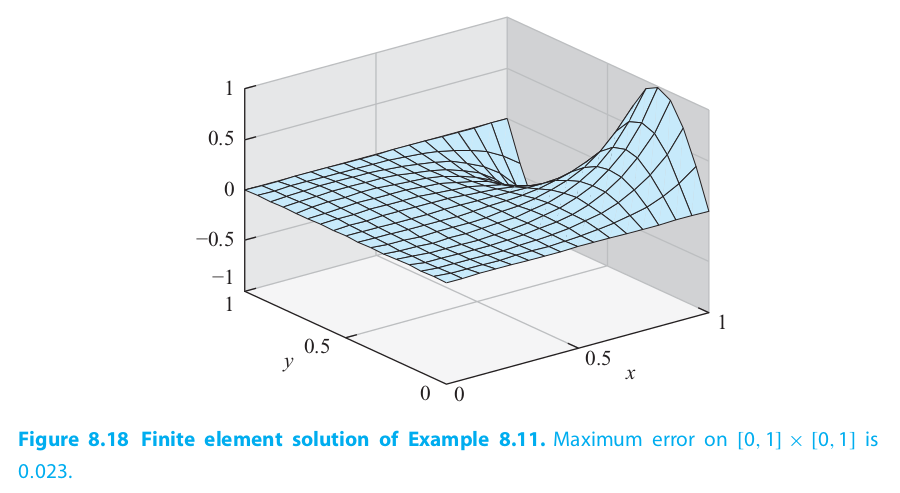